# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


To do: 
    can to count the class 
    then plu

Goal the P2 
exploring data 
*name labeling from csv to image 
- plot on the barh 

- turning into gray scale
- normalizing it 

Turning into grayscale easier to convert 
Normalize it with math 

Generated more data 
Either GAN or python manipulcation 

Balancing data and plotting graph 

Finally plug into NN 

---
## Step 0: Load The Data and exploration 

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/test.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_valid.shape)
print("Y_valid shape", Y_valid.shape)
print("Y_train shape", X_train.shape)
print("Y_test shape", X_test.shape)

X_train shape (34799, 32, 32, 3)
X_test shape (12630, 32, 32, 3)
Y_valid shape (12630, 32, 32, 3)
Y_valid shape (12630,)
Y_train shape (34799, 32, 32, 3)
Y_test shape (12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

From above, it shows there are 34799 training sets and 1263o testing sets. 
Each of the image has 32*32*3.
Next I would like to find out how many classes are there on  number of classes on the Y_training sets. 

In [2]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline

signnames = pd.read_csv('signnames.csv')
label_names = list(signnames)
signnames.head()
#X_train_id_to_label = group_img_id_to_lbl(y_train, sign_names)

# Let's print a few of those mappings now
#X_train_id_to_label.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


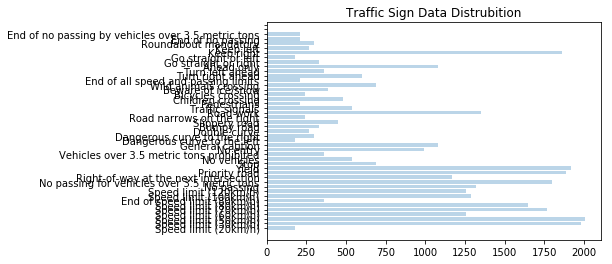

In [3]:
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train

# Get current size
figsize=(15, 7)
 
# Prints: [8.0, 6.0]

item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T
plt.figure(11)
plt.yticks(range(len(y_train)), signnames.SignName)
#plt.yticks(list(map(lambda x: label_dict[x], y_train['label'].value_counts().index.tolist())))            
plt.barh(item, count, alpha=0.3)
plt.title('Traffic Sign Data Distrubition')

plt.show()

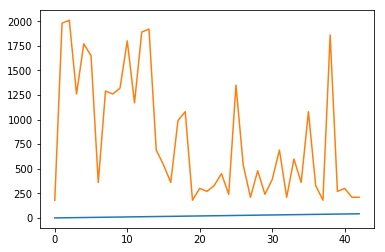

In [4]:
plt.plot(freq)
plt.show()

In [5]:
freq 

array([[   0,  180],
       [   1, 1980],
       [   2, 2010],
       [   3, 1260],
       [   4, 1770],
       [   5, 1650],
       [   6,  360],
       [   7, 1290],
       [   8, 1260],
       [   9, 1320],
       [  10, 1800],
       [  11, 1170],
       [  12, 1890],
       [  13, 1920],
       [  14,  690],
       [  15,  540],
       [  16,  360],
       [  17,  990],
       [  18, 1080],
       [  19,  180],
       [  20,  300],
       [  21,  270],
       [  22,  330],
       [  23,  450],
       [  24,  240],
       [  25, 1350],
       [  26,  540],
       [  27,  210],
       [  28,  480],
       [  29,  240],
       [  30,  390],
       [  31,  690],
       [  32,  210],
       [  33,  599],
       [  34,  360],
       [  35, 1080],
       [  36,  330],
       [  37,  180],
       [  38, 1860],
       [  39,  270],
       [  40,  300],
       [  41,  210],
       [  42,  210]])

Neural network requires tons of data for training. 
Recall from deep learning foundations course from deeplearning.ai, classic machine learning requires around 100-10,000 samples and deep learning requires around 1 million sample. 
The splitting and testing would be different to for ML that would requires 60% training, 20% dev and testing, whereas DL that would requires 98% training, 1% dev and testing. 

I would like to see how does it run on the neural network prior data arugmentations aka generating more data. 
also I would like to see Andrew Ng recommendations would be diff than the actualy result. 

Given neural network does not require any data balance having each class, I would like to see the difference between data split and also data size. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


there are always different approches on this: 
1. loop image one by one with CV2 (easiest way)
2. passing through normalizing (pixel - 128)/ 128, then img.astype(np.float32), passing through the CV2, and finally reshape from 32,32,3 to 32,32,1
X_train_gray = np.zeros((N, 32, 32, 1), dtype=np.float32)

- in your for loop
X_train_gray[i] = normalize_img(element)

https://discourse-cdn-sjc3.com/udacity/uploads/default/original/4X/5/7/1/5719666845aa31c56610cb2c27f4a16c7fc4c022.png
3.from image_preprocessor import ImagePreprocessor

image_preprocessor = ImagePreprocessor()
image_preprocessor.call() 

In [26]:
def normalize(img):
    return img.astype(float) / 255.0

def preprocess(img):
    image= [] 
    for i in img:
        image.append(normalize(i))
    return np.array(image).reshape((-1,32,32,1))  

X_train_processed = preprocess(X_train)
y_train_processed  = preprocess(y_train)

ValueError: cannot reshape array of size 34799 into shape (32,32,1)

In [ ]:
print ("X train proccessed dimensions:",X_train_processed.shape)
print ("y train proccessed dimensions:",y_train_processed.shape)

In [ ]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
print ("data_shuffled")

In [13]:
import cv2
#helper function on data augementations

''''''
#class DataAugementations:

#def randomized_effects(self,img):
#    np.random.randint(0, size=(1, 5)).astype('bool')[0]

#    my_list = [a, b, c] 
#    random.choice(my_list)()    
''''''
    #simpliest steps much faster to convert from the mentor subodh.malgonde
def normalize(img):
    return img.astype(float) / 255.0

#def rgb2gray(img):
#    return np.resize(cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)[:,:,0],(32,32,1))
#np.dot(img[...,:3],[0.299,0.587,0.114])

def preprocess(img):
    image= [] 
    for i in img:
        image.append(normalize(i))
    return np.array(image).reshape((-1,32,32,1))  

def translation(img):
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    shift_matrix = np.float32([[1,0,tr_x],[0,1,tr_y]])
    return cv2.wrapAffine(img, shfit_matrix, (x,y))

def rotation(img):
    row,col,_ = img.shape
    rotation_matrix =  cv2.getRotationMatrix2D((cols/2,rows/2),60,60) 
    return cv2.warpAffine(img, rotation_matrix, (col, row))

def brightness_augment(img): 
    brightness_multiplier = np.random.uniform(low=-0.25, high=0.25)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = hsv[:, :, 2] * (1.0 + brightness_multiplier)
    updated_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return updated_img


In [85]:
X_train_processed = preprocess(X_train)
X_test_processed  = preprocess(X_test)
X_valid_processed  = preprocess(X_valid)
n_classes = len(np.unique(y_train))

In [86]:
#prior augmenting traffic sign data, it would be better to normalize and grayscale the images from RBG. 
#that would save up the conputational time

print ("Original shape:" , X_train.shape)
print ("Normazlied shape:",X_train_processed[0].shape)
print (X_test_processed[0].shape)
print (X_valid_processed[0].shape)

Original shape: (34799, 32, 32, 3)
Normazlied shape: (32, 32, 1)
(32, 32, 1)
(32, 32, 1)


In [113]:
#augmentation data #1
#n_classes = np.bincount(y_train)
n_classes = len(np.unique(y_train))
mean_of_pics = int(np.mean(n_classes))
min_required = int(mean_of_pics)
min_required

43

In [124]:
indice = {}
ind_all = np.arange(len(y_train))
for i in range (len(np.unique(y_train))):
    ind_i = ind_all[y_train == i]
    indice[i] = ind_i
return indice

    

IndentationError: expected an indented block (<ipython-input-124-491b559f496d>, line 4)

In [117]:
ind_all.shape

(27839,)

In [12]:
(np.unique(y_train)).shape

(43,)

In [8]:
augmented_X_train = []
augment_Y_train = []
n_classes = len(np.unique(y_train))

#iterate through each classes
for class_n in range(n_classes):
    #when data is less than the mean of required augemented data
    if n_classes[class_n] < min_required:
        augmented_X_train = []
        augment_Y_train = []

        #new_img_count = min_required - n_classes[class_n]
        #count additional required new pics on each class
        for i in range(min_required - n_classes[class_n]):
            class_indices = np.where(y_train == i)
            augmented_X_train.append(brightness_augment(X_train[class_indices])[random.randint(0,n_classes[class_n] - 1)])
            augmented_Y_train.append(i)
#x = np.vstack((X_train, np.asarray(augmented_X_train)))
#y = np.hstack((y_train,, np.array(augment_Y_train)))

#https://github.com/mvirgo/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb

TypeError: 'int' object is not subscriptable

In [ ]:
#augmenting data 

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 810:
        for i in range(810 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_processed[0].shape)
            new_img = X_train_processed[class_indices[0][i % n_samples]]
            new_img = translation(rotation(brightness_augment(new_img)))
            X_train_processed = np.concatenate((X_train_processed, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

In [ ]:
#how many class per 
n_class, total_per_count = np.unique(y_train, return_counts = True)
df=[]
for traffic_sign in range(len(n_class)):
    images_per_class = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
   
n_samples

In [ ]:
#how does each class balanced
#https://github.com/ctsuu/Traffic-Sign-Classifier/blob/master/Traffic_Signs_Recognition-final.ipynb


print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_all)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='green')
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in regenarated dataset!!!')
grid(True)

show()

In [ ]:
agumentated_data = []
output_indices = []

max = np.ceil(np.mean(total_per_count)).astype('uint32')
for class_n in range(0, n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if total_per_count[class_n] < max:
        for i in range(max - n_samples):
            agumentated_data.append(DataAugementations(X_train_processed))
            
    


In [ ]:
n_samples

In [ ]:
def balance_classes(X, y, n_classes):
    """Balances the class distributions"""
    X_balanced = []
    y_balanced = []
    class_distributions = np.bincount(y)
    class_size_max = np.max(class_distributions)
    for c in range(0, n_classes):
        this_class_X = X[y==c]
        this_class_y = y[y==c]
        this_class_to_add = class_size_max-len(this_class_y)
        augmented_X, augmented_y = balance_class(this_class_X, this_class_y, this_class_to_add)
        X_balanced.append(augmented_X)
        y_balanced.append(augmented_y)
    return np.vstack(X_balanced), np.hstack(y_balanced)

In [ ]:
#save out pre-processed data 
class ImagePreprocessor():

    OUTPUT_FILE   = '../data/traffic-signs-data/train_preprocessed.p'
    SCALE_FACTOR  = 3.5
    TRAINING_FILE = '../data/traffic-signs-data/train.p'

    def __init__(self):
        plt.interactive(False)

        self.train_data = self.load_data()
        self.image_effect = ImageEffect()

        self.X_train = self.train_data['features']
        self.y_train = self.train_data['labels']

    def call(self):

        self.extended_data, self.extended_labels = self.augment_data(
            self.X_train,
            self.y_train,
            scale=self.SCALE_FACTOR
        )

        self.new_train_data = {
            'features': self.extended_data,
            'labels': self.extended_labels
        }

        self.save_data()

        

In [ ]:
sess = tf.Session()
z_dimensions = 100
z_test_placeholder = tf.placeholder(tf.float32, [None, z_dimensions])

In [ ]:
sample_image = generator(z_test_placeholder, 1, z_dimensions)
test_z = np.random.normal(-1, 1, [1,z_dimensions])

In [ ]:
sess.run(tf.global_variables_initializer())
temp = (sess.run(sample_image, feed_dict={z_test_placeholder: test_z}))

In [ ]:
my_i = temp.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()

In [ ]:
batch_size = 16
tf.reset_default_graph() #Since we changed our batch size (from 1 to 16), we need to reset our Tensorflow graph

sess = tf.Session()
x_placeholder = tf.placeholder("float", shape = [None,28,28,1]) #Placeholder for input images to the discriminator
z_placeholder = tf.placeholder(tf.float32, [None, z_dimensions]) #Placeholder for input noise vectors to the generator

In [ ]:
Dx = discriminator(x_placeholder) #Dx will hold discriminator prediction probabilities for the real MNIST images
Gz = generator(z_placeholder, batch_size, z_dimensions) #Gz holds the generated images
Dg = discriminator(Gz, reuse=True) #Dg will hold discriminator prediction probabilities for generated images

In [ ]:
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Dg, labels = tf.ones_like(Dg))) # ensure forward compatibility: function needs to have logits and labels args explicitly used

In [ ]:
unique, counts = np.unique(y_train_processed, return_counts=True)
class_info = {}
for unique, counts in zip(unique, counts):
    class_info[str(unique)] = {'description': signnames[str(unique)], 'count': counts}

pp = pprint.PrettyPrinter(indent=4, width=100)
print("Example Count in Each Class\n")
pp.pprint(class_info)

In [ ]:
###try to plug in NN 
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters.Used for tf.truncated_normal: randomly define variables 
    # for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1. Convolutional
    # Input = 32x32x3
    # output_height = (input_height - filter_height + Padding)/Stride = (32 - 5 + 1) / 1 = 28
    # output_width = (input_width - filter_width + Padding)/Stride = (32 - 5 + 1) / 1 = 28
    # Output = 28x28x6
    # filter 'shape' = (height, width, input_depth, output_depth)
    conv1_w = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    # strides = [batch, height, width, depth]
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1, 1, 1, 1], padding = 'VALID', name='conv1') + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1, name='conv1_relu')
    
    # Pooling
    # Input = 28x28x6
    # output_height = ((input_height - filter_height) / Stride) + 1 = (28 - 2 / 2) + 1 = 14
    # output_width = ((input_height - filter_height) / Stride) + 1 = (28 - 2 / 2) + 1 = 14
    # Output = 14x14x6
    # Kernel size - 'ksize' = [batch, height, width, depth]
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name='conv1_pool')
    
    # Layer 2. Convolutional
    # Input = 14x14x6 -> Output = 10x10x16
    conv2_w = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides = [1, 1, 1, 1], padding = 'VALID', name='conv2') + conv2_b
    
    # Activation
    conv2 = tf.nn.relu(conv2, name='conv2_relu')
    
    # Pooling
    # Input = 10x10x16 -> Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID', name='conv2_pool')
    
    # Flatten
    # Input = 5x5x16 -> Output = 400
    fc0 = flatten(conv2)
    
    # Layer 3. Fully connected
    # Input = 400 -> Output = 120
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w, name='fc1') + fc1_b
    
    # Activation
    fc1 = tf.nn.relu(fc1, name='fc1_relu')
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fc1_dropout')
    
    # Layer 4. Fully connected
    # Input = 120 -> Output = 84
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w, name='fc2') + fc2_b
    
    # Activation
    fc2 = tf.nn.relu(fc2, name='fc2_relu')
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob, name='fc2_dropout')
    
    # Layer 5. Fully connected
    # Input = 84 -> Output = 43 (Number of classes)
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w, name='logits') + fc3_b
    
    return logits

In [ ]:
# Placeholder to store input batches
# (BATCH_SIZE, height, width, depth)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# Placeholder for labels
y = tf.placeholder(tf.int32, (None))

# One-hot encoding of labels
one_hot_y = tf.one_hot(y, 43)

# Probability to keep units
keep_prob = tf.placeholder(tf.float32)

In [ ]:
# Learning rate
rate = 0.001

# Pass input data to the LeNet function
logits = LeNet(x)

# Compare logits to the ground-truth labels and calculate the cross entropy
# Cross entopy is a measure how different the logits
# are from the ground-truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
# Average the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)
# Use Adam algorithm (alternative of stochastic gradient descent)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Optimizer uses backpropagation to update the network and minimize training loss
training_operation = optimizer.minimize(loss_operation)

In [ ]:

# Compare the logit prediction to the one hot encoded ground-truth label# Compa 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data_processed, y_data_processed):
    num_examples = len(X_data_processed)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data_processed[offset:offset+BATCH_SIZE], y_data_processed[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training in progress...")
    print()
    for i in range(EPOCHS):
        # Shuffle the training data to ensure that trainint isn't biased
        # by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Break training data into batches and train the model on the each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 0.75})
        
        # In the end of each EPOCH evaluate the model on validation data
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {0} ...".format(i + 1))
        print("Training Accuracy = {:.5f}".format(training_accuracy))
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print()
    
    # Save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_sign_classifier')
    print("Model saved")

In [ ]:
unique, counts = np.unique(X_train_processed, return_counts=True)
plt.figure(3)
plt.bar(unique, counts, 0.5, color='b')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class after Augmentation')
plt.show()
print('\nCompleted plotting class frequency bar plot')

In [ ]:
counts = []
for i in range(43):
    counts.append(np.sum(y_train == i))

plt.bar(range(43),counts)

In [ ]:
#plot and see how does normailze and augmented data looks like
plt.subplot(1, 5, 4)
plt.title("Filter 2:\n Normalize", wrap=True)
plt.imshow(np.reshape(X_train_processed[0], (32, 32)), cmap='gray')

plt.subplot(1, 5, 5)
plt.title("Example from\n augmented training set", wrap=True)
#plt.imshow(np.reshape(X_train[3479], (32, 32)))

#plt.subplot(1, 5, 6)
#plt.title("Example from\n augmented training set", wrap=True)
plt.imshow(np.reshape(X_train_processed[2719], (32, 32)))

In [ ]:
#trying to impletment GAN 
X_train_GAN = X_train_processed.reshape([28,28])
X_test_GAN  = X_train_processed.reshape([28,28])
X_valid_GAN  = X_train_processed.reshape([28,28])

In [ ]:

img_per_class = 5

#show_random_dataset_images((np.reshape(X_train[for i in range:(len((X_train, print i)))], (32, 32)), X_train)


In [ ]:
#generated more data
from keras.preprocessing.image import ImageDataGenerator
#X_train_augmented = X_train_processed.reshape(X_train.shape[0], 1, 28, 28)
#X_test_augmented = X_test_processed.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
#X_train_augmented = X_train_processed.astype('float32')
#X_test_augmented = X_test_processed.astype('float32')
# define data preparation

def random_generator(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst


def rotation(img):
    datagen = ImageDataGenerator(rotation_range=90)
    return datagen.fit(img)

def flipping(img):
    datagen = ImageDataGenerator(vertical_flip=True)
    return datagen.fit(img)    
    
def shifting(img):
    datagen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
                             fill_mode='nearest')
    return datagen.fit(img)    
    
def augment_brightness_camera_images(img):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    img = np.array(img, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    img[:,:,2] = img[:,:,2]*random_bright
    img[:,:,2][img[:,:,2]>255]  = 255
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img
    
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rotation_range=90,vertical_flip=True,width_shift_range=.2, height_shift_range=.2,fill_mode='nearest')
#fit parameters from data
datagen.fit(X_train_processed)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_processed, y_train_processed, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [ ]:
from data_augmentation import data_augmentation


In [ ]:
split_index = int(len(train_processed['features'])*.99)
X_train = train_processed['features'][:split_index]
X_validation = train_processed['features'][split_index:]
X_test = test_processed['features']

y_train = train_processed['labels'][:split_index]
y_validation = train_processed['labels'][split_index:]
y_test = test_processed['labels']

In [ ]:
# splitting data into validation and testing 

X_train, X_validation, y_train, y_validation = train_test_split(X_test, y_test, 
                                                                test_size=0.01, random_state=42)



print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))


In [ ]:
len(y_train)

In [ ]:
#regular splitting 
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_normalized, y_train, test_size=0.2)
print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))
'''

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))
'''

In [ ]:
import cv2
print('X, y shapes:', X_train.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(43):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
            new_img = random_generator(shifting(flipping(augment_brightness_camera_images(new_img))))
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)

In [ ]:
input_indices = []
output_indices = []

for class_n in range(43):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
            new_img = rotation(flipping(new_img))
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)

In [ ]:
from skimage.transform import rotate
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [ ]:
X_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
batch_size = 64
num_classes = 2
epochs = 10
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=(32, 32, 1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
    
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
datagen.fit(x_train)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=20,
                        validation_data=(X_test, y_test))

In [ ]:
import tensorflow as tf; print(tf.__version__)

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)
#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
#Show the plot
plt.show()

In [ ]:
plt.imshow(np.reshape(X_train[0], (32, 32)), cmap='gray')


In [ ]:
sample_image = (np.reshape(X_train[0], (32, 32)))
plt.imshow(sample_image)

In [ ]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(sample_image,20,10,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:

gs1gs1  ==  gridspecgridspe .GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Multiply, concatenate
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
X_train.shape

In [89]:

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
def normalize(data):
    return data / 255 * 0.8 + 0.1

X_train = normalize(X_train) 
X_test = normalize(X_test) 

### Model Architecture

In [91]:
import tensorflow as tf
### Define your architecture here.
### Feel free to use as many code cells as needed.

#impletment LeNet-5
from tensorflow.contrib.layers import flatten

def LeNet(x, num_labels):    
    # Hyperparameters (default)
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print ('logits', logits)

    return logits

'''
def one_hot_workaround(y, num_labels):
    sparse_labels = tf.reshape(y, [-1, 1])
    derived_size = tf.shape(sparse_labels)[0]
    indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
    concated = tf.concat(1, [indices, sparse_labels])
    outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
    return tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# y_one_hot = tf.one_hot(y, n_classes)
y_one_hot = one_hot_workaround(y, n_classes)
logits = LeNet(x, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)

'''
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [92]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits


In [93]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')

done


In [94]:
rate = 0.0009
EPOCHS = 30

logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [95]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


In [97]:
BATCH_SIZE = 128
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...



ValueError: Cannot feed value of shape (128, 32, 32, 3) for Tensor 'Placeholder:0', which has shape '(?, 32, 32, 1)'

In [98]:
# Now (drumroll) evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

ValueError: Cannot feed value of shape (128, 32, 32, 3) for Tensor 'Placeholder:0', which has shape '(?, 32, 32, 1)'

In [ ]:
rate = 0.0009
EPOCHS = 50
BATCH_SIZE = 128
logits = LeNet(x, 43)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [100]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



ValueError: Cannot feed value of shape (128, 32, 32, 3) for Tensor 'Placeholder:0', which has shape '(?, 32, 32, 1)'

In [101]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 35
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        print("EPOCH {} ... ".format(i+1), end='')
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

NameError: name 'y_one_hot' is not defined

In [102]:

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 3))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 3))
#keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
#logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


TypeError: LeNet() missing 1 required positional argument: 'num_labels'

In [103]:

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

ValueError: At least two variables have the same name: beta1_power

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Also taken from LeNet lab initially.  I added printing of validation accuracy to diagnose
# overfitting/underfitting.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training with {} examples...".format(num_examples))
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={
                x: batch_x, 
                y: batch_y,
                keep_prob: dropout})

        print("EPOCH {} ...".format(i+1))   
        training_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy   = {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
img_idxs = range(1,9)
imgs = np.zeros((len(img_idxs), ) + image_shape, dtype='uint8')

for i in img_idxs:
    img = cv2.cvtColor(cv2.imread('images/img' + str(i) + '.jpg'), cv2.COLOR_BGR2RGB)
    # resize down to 32x32
    imgs[i-1] = cv2.resize(img, image_shape[:2])
    
def predict(imgs):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('sessions/.'))
        predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), 
                               feed_dict = {x: (imgs-train_mean)/train_stdev,
                                            keep_prob_cn: 1.,
                                            keep_prob_fc: 1.})
    return predictions

imgs, imgs_orig = preprocess(imgs)
predictions = predict(imgs)

plt.figure(figsize=(15, len(img_idxs)*2))
for i in img_idxs:
    plt.subplot(len(img_idxs), 2, 2*i-1)
    plt.imshow(imgs_orig[i-1])
    plt.axis('off')
    plt.subplot(len(img_idxs), 2, 2*i)
    plt.barh(np.arange(5), predictions.values[i-1], align='center', color='blue')
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    ax = plt.gca()
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels(class_table[predictions.indices[i-1]])
    ax.set_xlim([0,1])
    ax.invert_yaxis()

In [ ]:
import tensorflow as tf
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(signs_from_web_proccessed, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
ref:
    https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085
        
        
different types of gan 
https://github.com/eriklindernoren/Keras-GAN
    
    
    further development:
        https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
            c
                        
            https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc